# Много картиночек (и чуть-чуть работы с табличными данными)

В этом занятии мы будем еще больше работать с численными данными. Если вы чувствуете, что не до конца поняли прошлое занятие &mdash; можете вернутся к нему и задать вопросы на этой практике.


В этой практике мы научимся строить несколько новых типов картинок.

## Гистограммы

Напомним, что в прошлом занятии мы пришли к этой картинке:

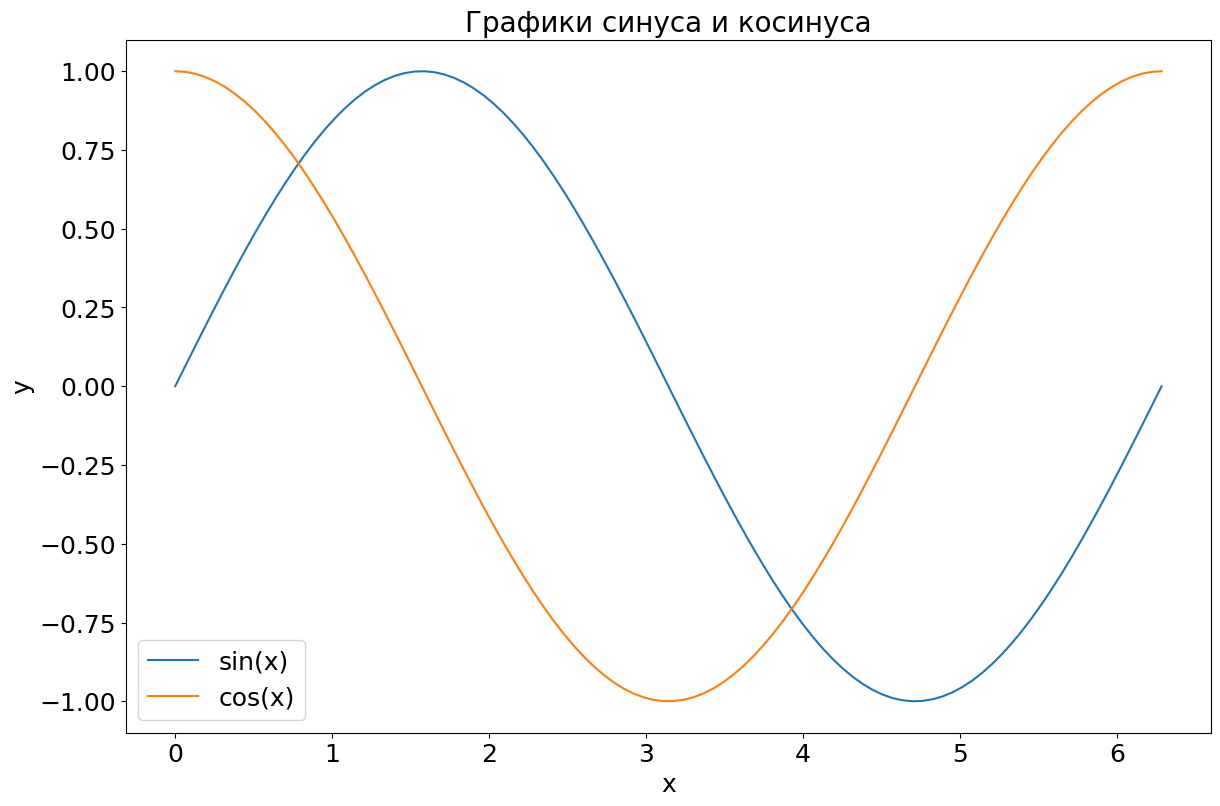

In [32]:
from lksh import plot
import numpy as np

x = np.linspace(0, 2*np.pi, 100)
plot(x, np.sin(x), xlabel='x', ylabel='y', title='Графики синуса и косинуса', label='sin(x)')
plot(x, np.cos(x), xlabel='x', ylabel='y', label='cos(x)')

Познакомимся с другим популярным видом графиков: гистограммой. Гистограмма &mdash; это один из способов визуализации данных. По сути она отражает распределение данных по некоторым значениям. Чтобы это осознать, разберём несложный пример.

Скажем, у нас есть некоторый набор данных &mdash; список из 30 чисел от 0 до 10:

In [33]:
a = [1, 2, 4, 6, 9, 10, 4, 5, 8, 1, 4, 5, 9, 7, 0, 1, 4, 0, 6, 3, 6, 2, 5, 8, 4, 9, 2, 0, 1, 4]
len(a) # показывает длину списка

30

Мы озадачились вопросом: как часто в нашем списке встречается число 5? Конечно, можно просто глазами пробежаться по списку и посчитать. Либо использовать метод `.count()`:

In [34]:
a.count(5) # если захотите использовать этот метод в дальнейшем, учтите, что он работает только с целыми числами,
           # то есть с переменными типа int

3

Но что если мы хотим узнать частоту появлений для каждого числа? И наглядно увидеть, какие встречаются чаще, а какие реже? В этом случае мы используем гистограмму.
![hist](Images/histogram.png)

Первая колонка отражает, сколько с нашем списке нулей &mdash; 3 штуки. Соответственно единичек &mdash; 4 штуки и т.д. Минимальное количество появлений &mdash; у чисел 3 и 7, максимальное &mdash; у числа 4. 

В нашем примере на гистограмме отражалось количество появлений отдельных чисел. Но бывает, например, что в списке есть числа от 0 до 100 и нам нужно посмотреть частоту появлений на некотором промежутке, скажем от 30 до 40. Тогда нам не очень удобно строить гистограмму по появлению каждого отдельного числа, а потом суммировать значения для чисел 30, 31, 32, ..., 40. Гораздо проще сразу выбрать разбиение по десяткам:
![hist](Images/histnorm.png)

Здесь сразу видно, что числа от 30 до 40 встретились в списке примерно 13 раз.\
Также гистограмма наглядно показывает, какие числа встречаются наиболее часто (в данном примере это промежуток от 50 до 60). Это бывает полезно для простого статистического анализа данных.

Длину интервалов (или по-другому *бинов*), как и их количество, можно выбирать самостоятельно. Чаще всего задаётся именно количество бинов, а длина их подбирается так, чтобы все прямоугольники на гистограмме были одинаковой ширины.

Суммируя вышесказанное, **построение гистограммы происходит следующим образом**:
1. Задаётся количество бинов (например, 10).
2. В списке ищется максимальное и минимальное значение (например, 0 и 100).
3. Высчитывается длина интервалов: разность между максимумом и минимумом делится на количество бинов ($\frac{100-0}{10}=10$).
4. Подсчитывается, сколько элементов списка попадает в каждый из промежутков (например, в интервал от 0 до 10 попадает 4 элемента, от 10 до 20 &mdash; 3 элемента и т.д.)

В модуле `lksh` есть функция для построения гистограммы `histogram`. В качестве аргумента ей необходимо указать только список с данными. Попробуйте построить гистограмму [случайно сгенрированного датасета](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5):

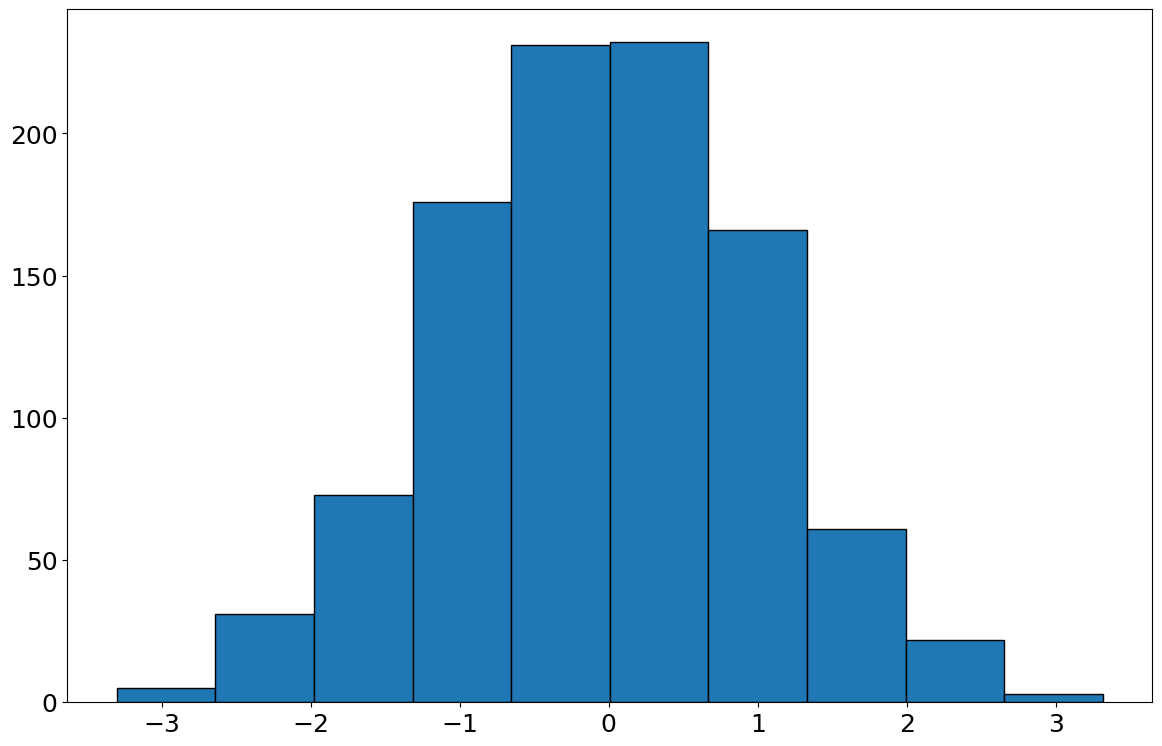

In [35]:
from lksh import histogram

dataset = np.random.randn(1000) # эту строчку понимать не обязательно
histogram(dataset, bins=10)  # попробуйте разные значения количества бинов

## Дополнительные задания, если есть время и желание:

## ✨ Что за прямоугольник??

Почему вместо гистограммы у студента рисуется синий прямоугольник?

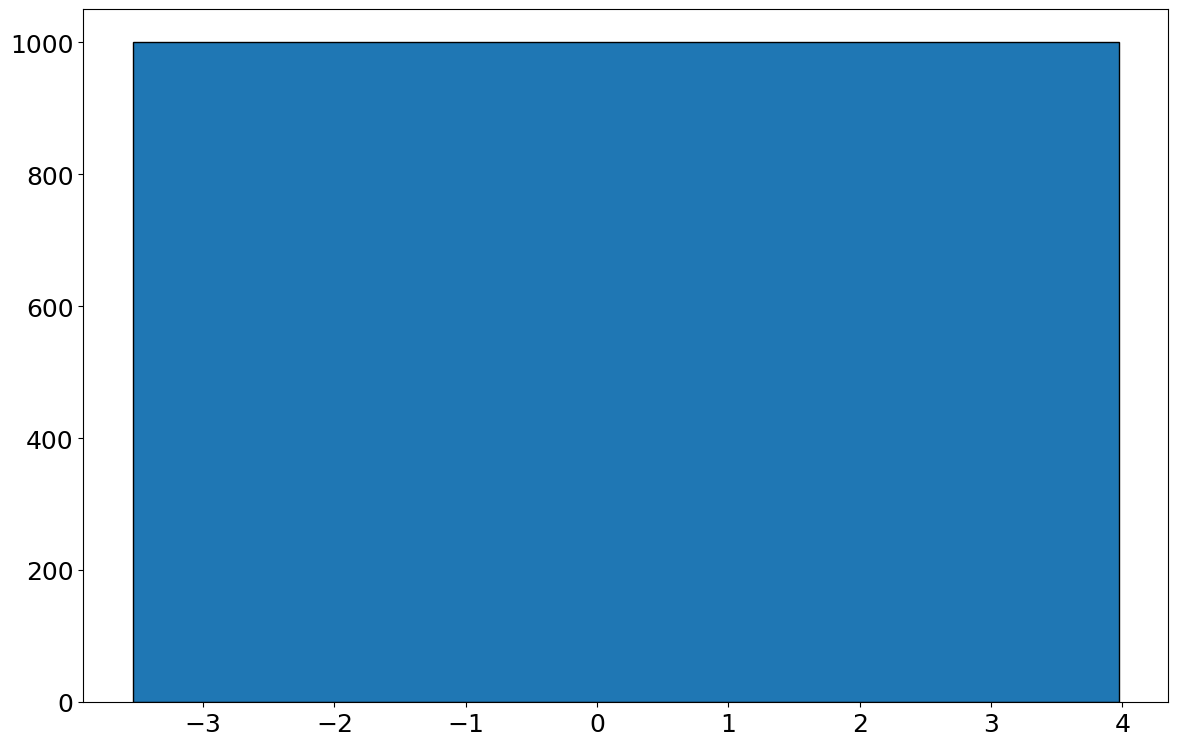

In [46]:
dataset = np.random.randn(1000) # эту строчку понимать не обязательно
histogram(dataset, bins=1)  

## Работа с табличными данными

Очень часто данные находятся в табличном формате, похожем на данные в `excel`, но выглядящим немного по-другому. В самом простом виде мы просто записываем элементы этой таблички через запятую, отсюда и название формата: `.csv`: `comma separated values` (данные, разделенные запятой). Такой формат можно импортировать и экспортировать из `excel` или `Google Docs` (можете попробовать с вашей любимой табличкой из экселя).

В `python` мы тоже можем работать с табличными данными, для этого можно использовать модуль `pandas`:

In [36]:
import pandas as pd

Давайте посмотрим на то как считывать `.csv` файлы в `pandas`. Для этого достаточно использовать функцию `read_csv` из `pandas`. Попробуем загрузить пример `.csv` файла:

In [37]:
exoplanets = pd.read_csv('data/exoplanets_imaging.csv')
exoplanets

,pl_name,hostname,discoverymethod,disc_year,ra,dec
0,1RXS J160929.1-210524 b,1RXS J160929.1-210524,Imaging,2008,242.376234,-21.083140
1,1RXS J160929.1-210524 b,1RXS J160929.1-210524,Imaging,2008,242.376234,-21.083140
2,1RXS J160929.1-210524 b,1RXS J160929.1-210524,Imaging,2008,242.376234,-21.083140
3,1RXS J160929.1-210524 b,1RXS J160929.1-210524,Imaging,2008,242.376234,-21.083140
4,2M0437 b,2MASS J04372171+2651014,Imaging,2021,69.340553,26.850300
...,...,...,...,...,...,...
142,bet Pic b,bet Pic,Imaging,2008,86.821234,-51.066148
143,bet Pic b,bet Pic,Imaging,2008,86.821234,-51.066148
144,kap And b,kap And,Imaging,2012,355.102597,44.333851
145,kap And b,kap And,Imaging,2012,355.102597,44.333851


Для того чтобы обратиться к одной из колонок, нужно задать ее квадратных скобках. Давайте посмотрим на колонку `disc_year` (год открытия экзопланеты):

In [38]:
exoplanets['disc_year']

0      2008
1      2008
2      2008
3      2008
4      2021
       ... 
142    2008
143    2008
144    2012
145    2012
146    2022
Name: disc_year, Length: 147, dtype: int64

С такой колонкой можно делать почти все то же самое, что и с `ndarray` и с списками. Давайте посмотрим на гистограмму распредления открытия экзопланет методом прямого изображения:

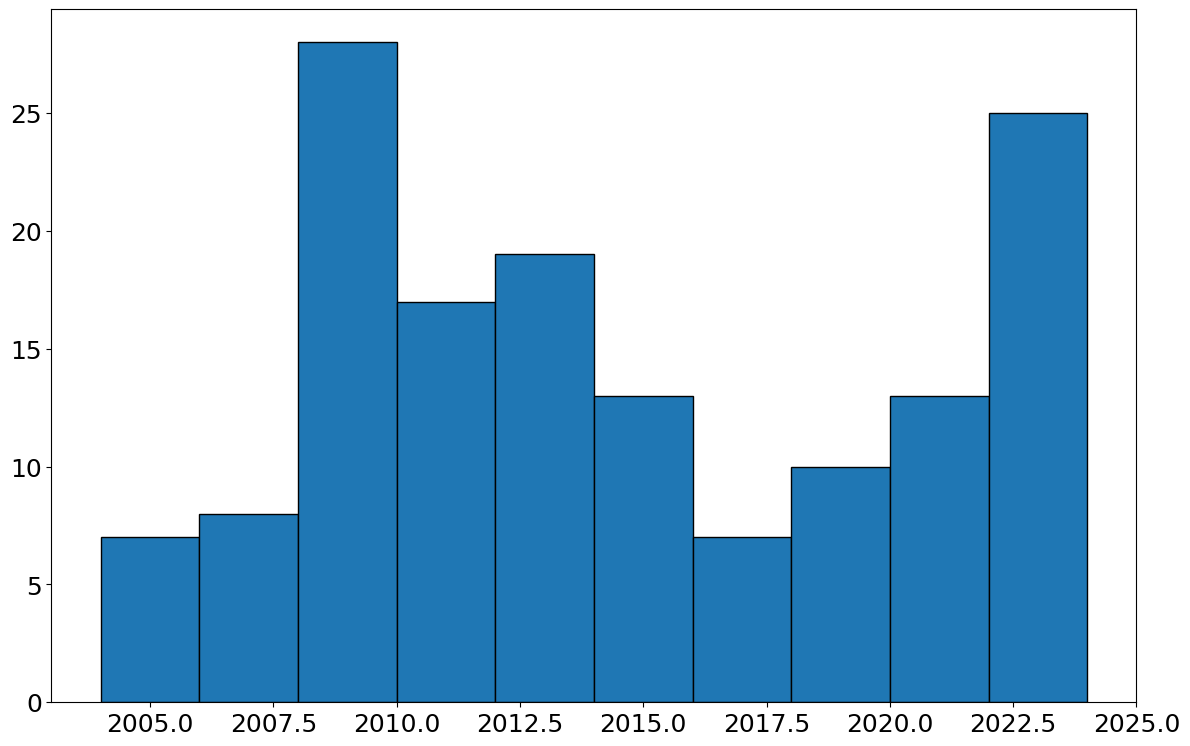

In [39]:
histogram(exoplanets['disc_year'].values, bins=10)

## ✨✨ Дополнительная секция: Скаттерплот

Еще один тип графиков, который бывает довольно полезно &mdash; `scatterplot`. В самом простом случае это обычный plot:

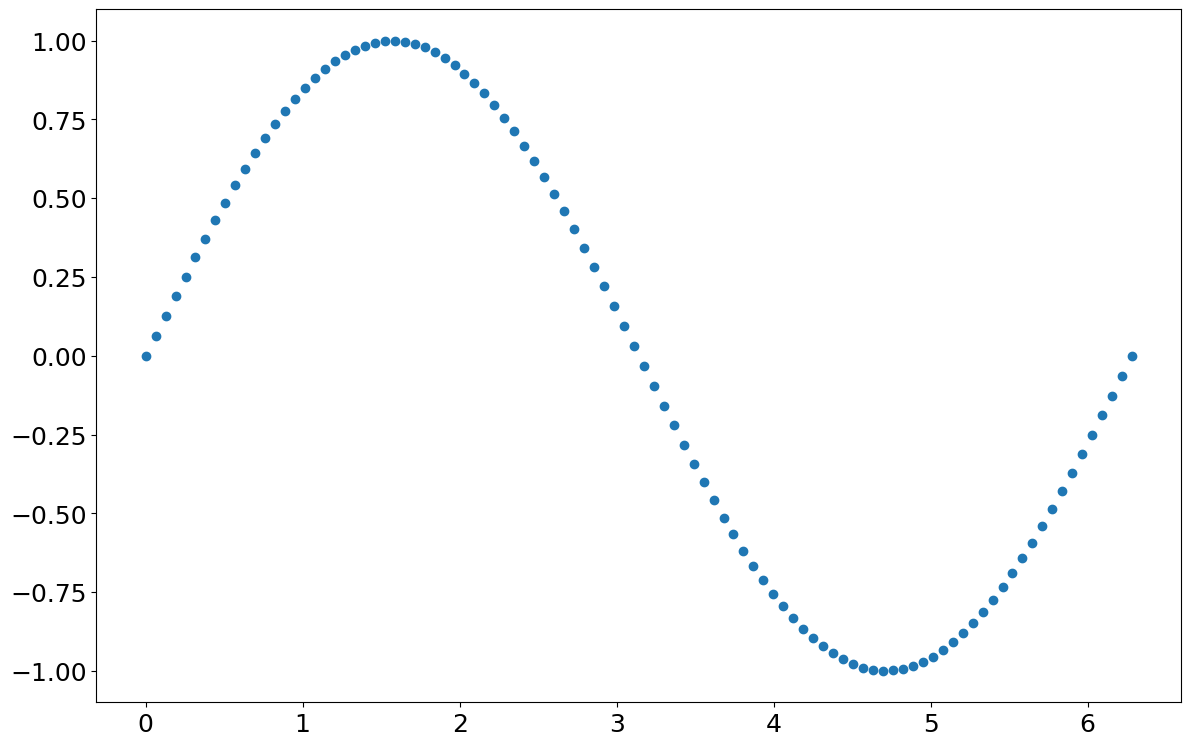

In [40]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.scatter(x, y)

Все очень похоже, только вместо линий соединяющих точки данных у нас просто точки. Однако, `scatter` может рисовать не только пары значений `x` и `y`, но и `x`, `y` и `z`. Как же мы будем отображать `z`? Цветом! Давайте попробуем:

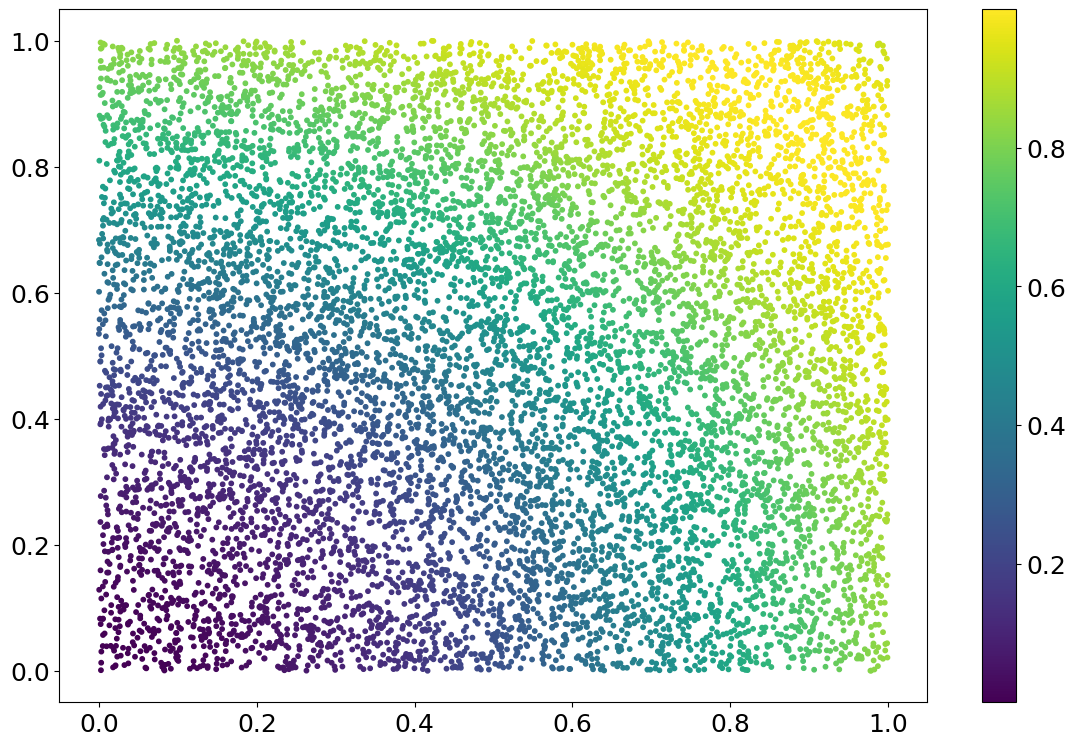

In [41]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

z = np.sin(x**2 + y**2) 

plt.scatter(x, y, c=z, s=10) # c=z означает, что z будет задавать цвет точки
# s=10 означает, что размер точки будет 10
# plt.xlabel('Икс') # так можно оси подписывать в matplotlib
# plt.ylabel('Игрек') # никому не рассказывайте это секрет.
plt.colorbar() # добавляем цветовую шкалу


Это один из способов отображать данные с тремя осями. Этот способ чаще всего используется когда у нас нету структурированных данных, а есть только набор точек вида `(x_i, y_i, z_i)`.


Сгенерируем данные немного другие данные, добавим сюда шум:

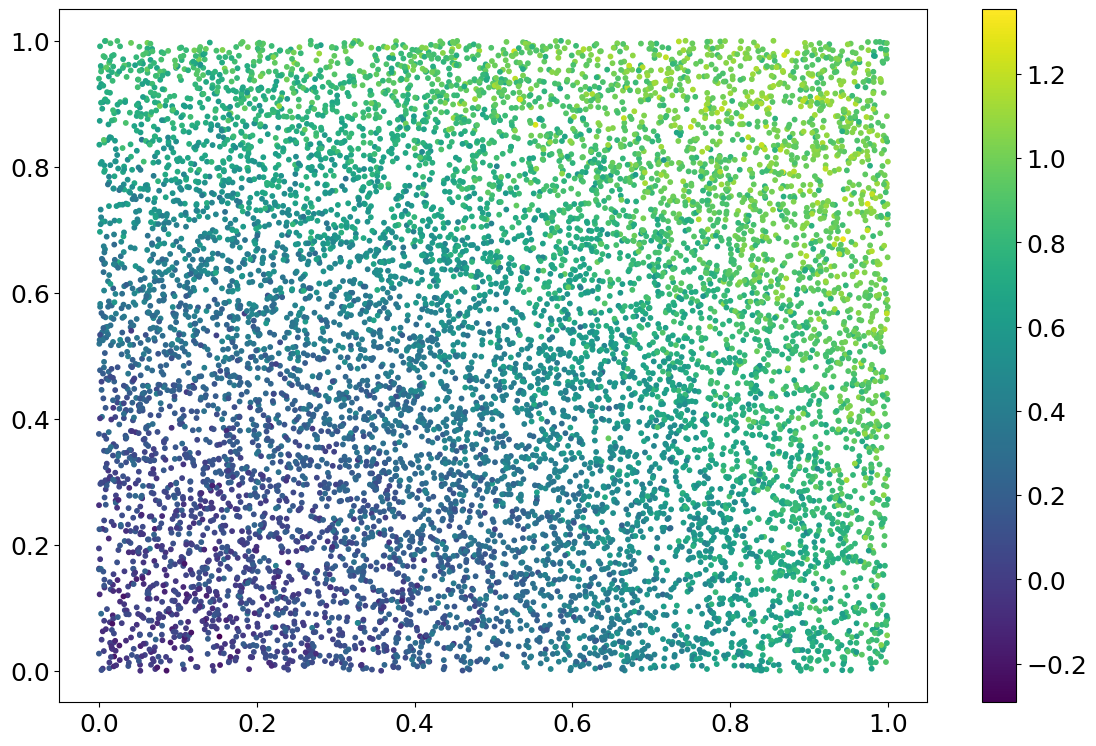

In [42]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

z = np.sin(x**2 + y**2) + 0.1*np.random.randn(len(x), 1) # не обязательно это понимать

plt.scatter(x, y, c=z, s=10) # c=z означает, что z будет задавать цвет точки
# s=10 означает, что размер точки будет 10
# plt.xlabel('Икс') # так можно оси подписывать в matplotlib
# plt.ylabel('Игрек') # никому не рассказывайте это секрет.
plt.colorbar() # добавляем цветовую шкалу


Специально добавим сюда случайный редкий шум, который будет сильно выше данных. Такой шум называется *выбросами* или *аутлаерами*:

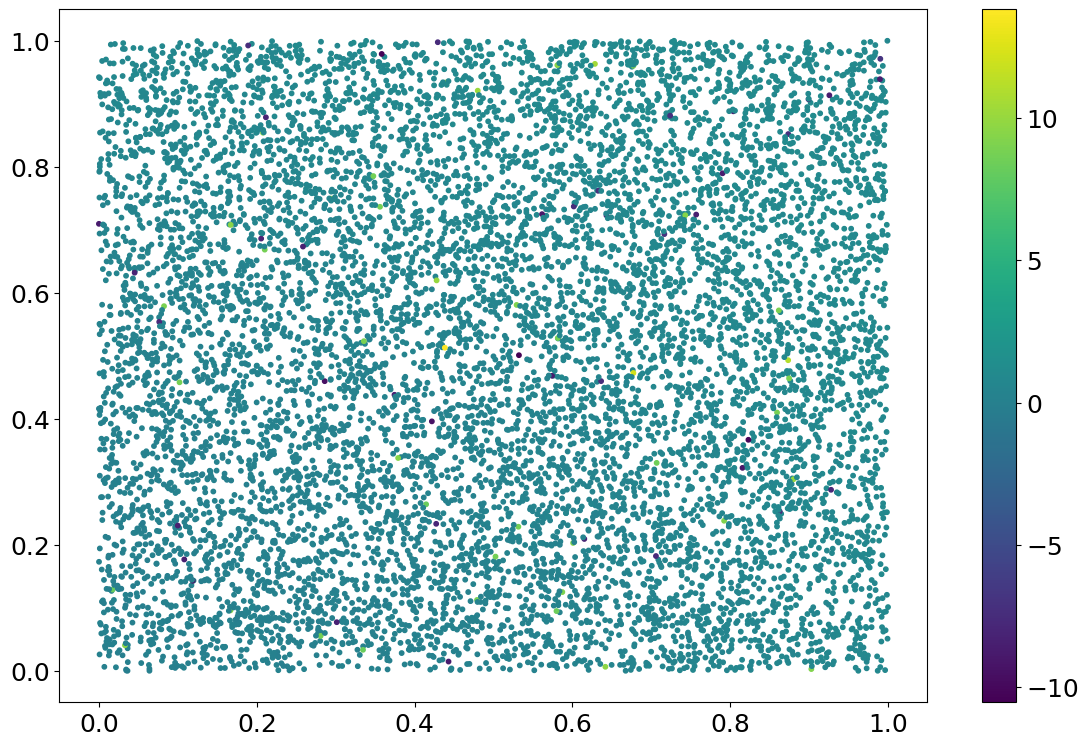

In [43]:
x = np.random.rand(10000,1)
y = np.random.rand(10000,1)

noise = 3*np.random.randn(len(x), 1)
noise[np.abs(noise) < 8] = 0

z = np.sin(x**2 + y**2) + 0.1*np.random.randn(len(x), 1) + noise

plt.scatter(x, y, c=z, s=10) # c=z означает, что z будет задавать цвет точки
# s=10 означает, что размер точки будет 10
# plt.xlabel('Икс') # так можно оси подписывать в matplotlib
# plt.ylabel('Игрек') # никому не рассказывайте это секрет.
plt.colorbar() # добавляем цветовую шкалу


А куда пропала зависимость из данных? Дело в том что такие выбросы очень влияют на визуализацию. По сути шкала цвета (`colorbar`) отображает самым темным/светлым цветом самые маленькие/большие значения в данных, которых у нас всего чуть-чуть. Есть три способа с этим бороться:
- Убрать выбросы из данных (сложно)
- Поменять границы отображения цвета (просто)
- Использовать логарифмическую шкалу по цвету (просто, но не сразу понятно)


✨ Посмотрим только на второй метод. Для начала поменяем границы отображения цвета. Для этого воспользуемся аргументом `vmin` и `vmax` в `plt.scatter`. Ориентриуесь на цветовую школу и чиселки на ней, попробуйте подставить какие-то значения после знака равно в `vmin=` и `vmax=` внизу:

In [ ]:
plt.scatter(x, y, c=z, s=10, vmin=, vmax=) # подберите значения для vmin и vmax
plt.colorbar() 